# **Simple Neural Network Implementation**
![Screenshot 2026-02-20 040610.png](<attachment:Screenshot 2026-02-20 040610.png>)

This notebook implements this Neural Network from scratch using only **numpy**

* **Activation Function:** Tanh ($tanh(z)=\frac{exp(z)-exp(-z)}{exp(z)+exp(-z)}$) 
* **Weight Initialization:** Random values in the interval $[-0.5, 0.5]$ 
* **Biases:** $b_1 = 0.5$ and $b_2 = 0.7$ 
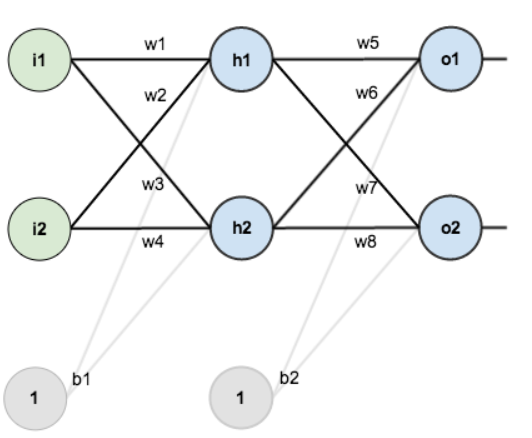

### The code 

In [46]:
import numpy as np

In [47]:
inputs = np.array([0.05, 0.10])
targets = np.array([0.01, 0.99])

In [48]:
np.random.seed(42)

# Initializing the weights 
weights = np.array(np.random.uniform(-0.5, 0.5, 8)).reshape(4, -1) 

print("- INITIAL WEIGHTS")
print(f"w1, w2 (to h1): {weights[0]}")
print(f"w3, w4 (to h2): {weights[1]}")
print(f"w5, w6 (to o1): {weights[2]}")
print(f"w7, w8 (to o2): {weights[3]}")

- INITIAL WEIGHTS
w1, w2 (to h1): [-0.12545988  0.45071431]
w3, w4 (to h2): [0.23199394 0.09865848]
w5, w6 (to o1): [-0.34398136 -0.34400548]
w7, w8 (to o2): [-0.44191639  0.36617615]


In [49]:
# Initializing the biases
biases = np.array([0.5, 0.7])
for layer in range(2):
    print(f'The bias for layer number {layer+1} is {biases[layer]}')

The bias for layer number 1 is 0.5
The bias for layer number 2 is 0.7


In [50]:
def calculate_net(features, weights, bias):
    # weights shape (1 x features) * transposed inputs shape (features x 1) = output shape (1 * 1)
    return  np.dot(weights, np.transpose(features)) + bias

def Tanh_activation(net_output):
    return (np.exp(net_output) - np.exp(-net_output)) / (np.exp(net_output) + np.exp(-net_output))

In [51]:
# Hidden layer
net_h1 = calculate_net(inputs, weights[0], biases[0])
out_h1 = Tanh_activation(net_h1)

net_h2 = calculate_net(inputs, weights[1], biases[0])
out_h2 = Tanh_activation(net_h2)

# Output layer
hidden_outputs = np.array([out_h1, out_h2]) # updating the inputs for the new layer

net_o1 = calculate_net(hidden_outputs, weights[2], biases[1])
out_o1 = Tanh_activation(net_o1)

net_o2 = calculate_net(hidden_outputs, weights[3], biases[1])
out_o2 = Tanh_activation(net_o2)

# Calculate the error
final_outputs = np.array([out_o1, out_o2])
total_error = 0.5 * np.sum((targets - final_outputs)**2)

In [52]:
print("- HIDDEN LAYER (Biases = 0.5)")
print(f"Net h1 = {net_h1:.5f}  =>  Out h1 = {out_h1:.5f}")
print(f"Net h2 = {net_h2:.5f}  =>  Out h2 = {out_h2:.5f}")

print("\n- OUTPUT LAYER (Biases = 0.7)")
print(f"Net o1 = {net_o1:.5f}  =>  Out o1 = {out_o1:.5f}")
print(f"Net o2 = {net_o2:.5f}  =>  Out o2 = {out_o2:.5f}")

print("\n- FINAL RESULTS & ERROR")
print(f"Network Output = {final_outputs}")
print(f"Target Output  = {targets}")
print(f"Total Error    = {total_error:.5f}")

- HIDDEN LAYER (Biases = 0.5)
Net h1 = 0.53880  =>  Out h1 = 0.49208
Net h2 = 0.52147  =>  Out h2 = 0.47883

- OUTPUT LAYER (Biases = 0.7)
Net o1 = 0.36601  =>  Out o1 = 0.35050
Net o2 = 0.65788  =>  Out o2 = 0.57695

- FINAL RESULTS & ERROR
Network Output = [0.3505004  0.57695014]
Target Output  = [0.01 0.99]
Total Error    = 0.14328


### **OOP structured (Vectorized)**

In [53]:
class Layer:
    def __init__(self, n_neurons, n_inputs, bias):
        self.weights = np.random.uniform(-0.5, 0.5, (n_neurons, n_inputs))
        self.bias = np.full((1, n_neurons), bias)
        self.net_output = None
        self.activation_output = None
    
    def tanh(self, net_output):
        return (np.exp(net_output) - np.exp(-net_output)) / (np.exp(net_output) + np.exp(-net_output))
    
    def layer_feedforward(self, inputs):
        self.net_output = np.dot(inputs, self.weights) + self.bias
        self.activation_output = self.tanh(self.net_output)

        return self.activation_output

class NeuralNetwork:
    def __init__(self):
        self.layers = []
    
    def add_layer(self, layer):
        self.layers.append(layer)
    
    def feedforward(self, inputs):
        current_input = inputs
        for layer in self.layers:
            current_input = layer.layer_feedforward(current_input)
        return current_input
    
    def calculate_error(self, network_output, network_target):
        return 0.5 * np.sum((network_target - network_output)**2)

In [54]:
np.random.seed(42)

inputs = np.array([[0.05, 0.10]])  
targets = np.array([[0.01, 0.99]]) 

nn = NeuralNetwork()
nn.add_layer(Layer(2, 2, 0.5))
nn.add_layer(Layer(2, 2, 0.7))

network_output = nn.feedforward(inputs)
network_error = nn.calculate_error(targets, network_output)

In [55]:
hidden_layer = nn.layers[0]
output_layer = nn.layers[1]

print("\n[1] HIDDEN LAYER (Biases = 0.5)")
print(f"Weights:\n{hidden_layer.weights}")
print(f"Net Output : {hidden_layer.net_output[0]}")
print(f"Activation : {hidden_layer.activation_output[0]}")

print("\n[2] OUTPUT LAYER (Biases = 0.7)")
print(f"Weights:\n{output_layer.weights}")
print(f"Net Output : {output_layer.net_output[0]}")
print(f"Activation : {output_layer.activation_output[0]}")

print("\n[3] FINAL RESULTS & ERROR")
print(f"Network Output : {final_outputs[0]}")
print(f"Target Output  : {targets[0]}")
print(f"Total Error    : {total_error:.5f}")


[1] HIDDEN LAYER (Biases = 0.5)
Weights:
[[-0.12545988  0.45071431]
 [ 0.23199394  0.09865848]]
Net Output : [0.5169264  0.53240156]
Activation : [0.47532432 0.48721472]

[2] OUTPUT LAYER (Biases = 0.7)
Weights:
[[-0.34398136 -0.34400548]
 [-0.44191639  0.36617615]]
Net Output : [0.32118913 0.71489224]
Activation : [0.31058174 0.61373546]

[3] FINAL RESULTS & ERROR
Network Output : 0.3505003965453816
Target Output  : [0.01 0.99]
Total Error    : 0.14328
